In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163754 sha256=977f6193f6902de80876a2036b026c968836acdbbd7d691f0250b9f6eaa22714
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
final_rating = pickle.load(open('/content/drive/MyDrive/final_rating.pkl', 'rb'))

In [5]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,1.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,0.6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,1.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [6]:
import pandas as pd
import surprise as srp
from surprise.model_selection import train_test_split

from surprise import accuracy
from surprise import Dataset, NormalPredictor, Reader
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(0.0, 1.0))

In [7]:
data = Dataset.load_from_df(final_rating[["user_id", "title", "rating"]], reader)

In [8]:
trainset, testset = train_test_split(data, test_size=0.20 , random_state=42)

In [9]:
model = srp.SVD()

In [10]:

model.fit(trainset)

predictions2 = model.test(testset)

# RMSE
accuracy.rmse(predictions2)

RMSE: 0.3282


0.32821760928200844

In [11]:
# MAE
accuracy.mae(predictions2)

MAE:  0.2462


0.24623066240613897

In [12]:

import numpy as np

# Obtenez l'ID de l'article qui vous intéresse
title_of_interest = 'Harry Potter and the Prisoner of Azkaban (Book 3)'  # Exemple de titre
item_id_of_interest = trainset.to_inner_iid(title_of_interest)  # obtenu l'id de titre

# obtenir les facteurs
item_factors = model.qi[item_id_of_interest]

# calculer la similarité avec les autres livres
similarities = np.dot(model.qi, item_factors)

# Obtenez les indices des 6 principaux éléments similaires (sans prendre l'élément d'intérêt lui-même)
top_n_similar_indices = np.argsort(-similarities)[:6]  # 6 similaire books

# convertire les ids des bokks similaire pour obtenire leur title
similar_item_titles = [trainset.to_raw_iid(inner_id) for inner_id in top_n_similar_indices]

print(similar_item_titles)

['Harry Potter and the Prisoner of Azkaban (Book 3)', 'Full Circle', 'Moment of Truth', 'Lake Wobegon Days', 'All the Pretty Horses (The Border Trilogy, Vol 1)', 'Lake Wobegon days']


In [13]:
cross_val_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print cross-validation results
for measure in ['test_rmse', 'test_mae']:
    print(f"{measure}: {cross_val_results[measure].mean()}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3278  0.3245  0.3288  0.3276  0.3255  0.3269  0.0016  
MAE (testset)     0.2448  0.2428  0.2457  0.2444  0.2433  0.2442  0.0010  
Fit time          1.10    1.10    1.07    1.07    1.09    1.09    0.01    
Test time         0.25    0.10    0.10    0.23    0.10    0.16    0.07    
test_rmse: 0.3268592440599309
test_mae: 0.24420056888695804


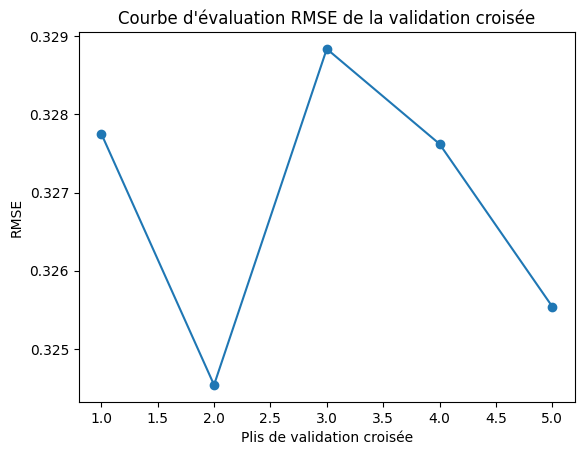

In [14]:
from matplotlib import pyplot as plt

# Extraire les scores RMSE de chaque pli
rmse_scores = cross_val_results['test_rmse']

# Afficher la courbe d'évaluation
plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o')
plt.title('Courbe d\'évaluation RMSE de la validation croisée')
plt.xlabel('Plis de validation croisée')
plt.ylabel('RMSE')
plt.show()